In [1]:
import sys
import os
path = os.getcwd()
sys.path.insert(1, path[:-4])

import core.specializer as s
import numpy as np
from importlib import reload
import networkx as nx
import matplotlib.pyplot as plt
import time
import autograd.numpy as anp
import scipy.linalg as la

In [2]:
reload(s)

def sig1(x):
    return .5*anp.tanh(x)
def sig2(x):
    y = -2.0*anp.tanh(x)
    return y
def sig3(x):
    y = (1/3)*anp.tanh(x)
    return y

def zero(x):
    return 0*x

def logistic(x):
    x = x % 1
    return 4*x*(1-x)
def doubling_map(x):
    if x > .5:
        return 2*x
    else:
        return 2*x - 2
    
def lin1(x):
    y = x
    return y
def lin2(x):
    return .25*x

def fun2(x):
    y = (.05)*x + .05
    return y
def fun1(x):
    y = (9/10)*x + 0.5
    return y

In [3]:
B = np.array([
    [0,0,0,0,0,0,0,1],
    [1,0,1,0,0,0,0,0],
    [1,1,0,0,0,0,0,0],
    [0,1,1,0,0,1,0,0],
    [0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,1,0],
    [0,0,0,1,1,0,0,0],
    [0,0,0,0,0,0,1,0]
])
f = np.array([
    [zero,zero,zero,zero,zero,zero,zero,lin2],
    [lin2,zero,lin1,zero,zero,zero,zero,zero],
    [lin2,lin2,zero,zero,zero,zero,zero,zero],
    [zero,lin2,lin2,zero,zero,lin1,zero,zero],
    [zero,zero,zero,lin1,zero,zero,zero,zero],
    [zero,zero,zero,zero,zero,zero,lin1,zero],
    [zero,zero,zero,lin1,lin1,zero,zero,zero],
    [zero,zero,zero,zero,zero,zero,lin1,zero]
])
a = np.array(
    [lin2, lin2, lin2, lin2, lin2, lin2, lin2, lin2]
)
labels = ['1', '2', '3', '4','5','6','7','8']
lin = s.DirectedGraph(B, (a,f), labels=labels)

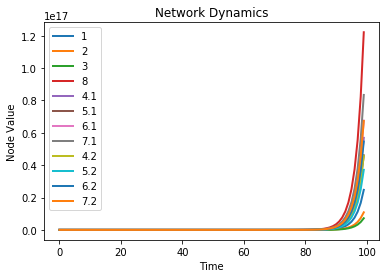

In [4]:
base = ['1','2','3','8']
lin.specialize(base)
x0 = np.random.random(lin.n)
y = lin.iterate(100, x0, graph=True)

In [5]:
lin.A

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]])

In [6]:
B = np.array([
    [0,0,0,0,0,0,0,1],
    [1,0,1,0,0,0,0,0],
    [1,1,0,0,0,0,0,0],
    [0,1,1,0,0,1,0,0],
    [0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,1,0],
    [0,0,0,1,1,0,0,0],
    [0,0,0,0,0,0,1,0]
])
f = np.array([
    [zero,zero,zero,zero,zero,zero,zero,fun2],
    [fun2,zero,fun2,zero,zero,zero,zero,zero],
    [fun2,fun2,zero,zero,zero,zero,zero,zero],
    [zero,fun2,fun2,zero,zero,fun2,zero,zero],
    [zero,zero,zero,fun2,zero,zero,zero,zero],
    [zero,zero,zero,zero,zero,zero,fun2,zero],
    [zero,zero,zero,fun2,fun2,zero,zero,zero],
    [zero,zero,zero,zero,zero,zero,fun2,zero]
])
a = np.array(
    [sig1, sig1, sig1, sig1, sig1, sig1, sig1, sig1]
)
labels = ['1', '2', '3', '4','5','6','7','8']

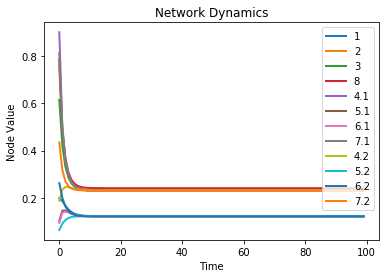

In [7]:
non = s.DirectedGraph(B, (a,f), labels=labels)
base = ['1','2','3','8']
non.specialize(base)
x0 = np.random.random(non.n)
y = non.iterate(100, x0, graph=True)

In [8]:
A = np.array(
    [
        [0,0,0,1],
        [1,0,1,0],
        [1,1,0,0],
        [0,1,1,0]
    ]
)
f = np.array(
    [
        [zero,zero,zero,lin2],
        [lin2,zero,lin2,zero],
        [lin1,lin2,zero,zero],
        [zero,lin2,lin1,zero]
    ]
)
a = np.array([lin2,lin2,lin2,lin2])
labels = ['1','2','3','4']

In [9]:
sm = s.DirectedGraph(A, (a,f), labels=labels)
print(sm.stability_matrix())
print(np.real(la.eig(sm.stability_matrix()[1:3,1:3])[0]))
base = ['1','4']
sm.specialize(base)

[[0.25 0.   0.   0.25]
 [0.25 0.25 0.25 0.  ]
 [1.   0.25 0.25 0.  ]
 [0.   0.25 1.   0.25]]
[0.5 0. ]


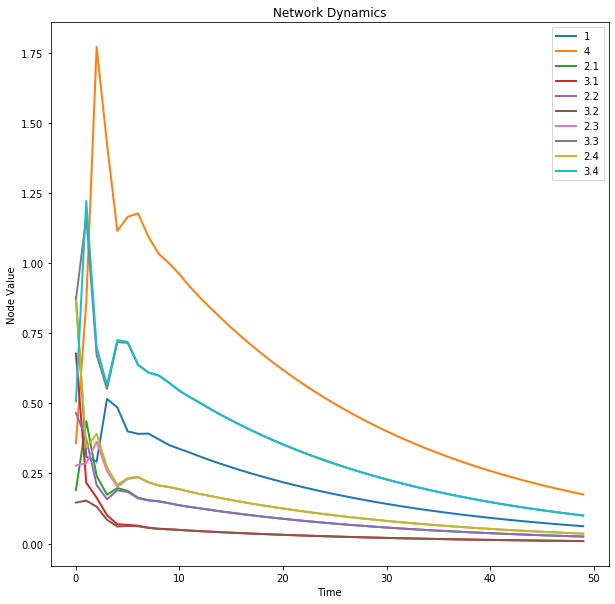

In [10]:
x0 = np.random.random(sm.n)
plt.figure(figsize=(10,10))
y = sm.iterate(50, x0, graph=True, save_img=True, title='linear')

In [11]:
A = np.array(
    [
        [0,0,0,1],
        [1,0,1,0],
        [1,1,0,0],
        [0,1,1,0]
    ]
)
f = np.array(
    [
        [zero,zero,zero,sig1],
        [sig1,zero,sig3,zero],
        [sig2,sig3,zero,zero],
        [zero,fun1,fun2,zero]
    ]
)
a = np.array([logistic,sig1,sig1,logistic])
labels = ['1','2','3','4']

In [12]:
sm = s.DirectedGraph(A, (a,f), labels=labels)
print(sm.stability_matrix())
print(np.real(la.eig(sm.stability_matrix()[1:3,1:3])[0]))
base = ['1','4']
sm.specialize(base)

[[4.         0.         0.         0.49999998]
 [0.49999998 0.49999998 0.33333332 0.        ]
 [1.99999992 0.33333332 0.49999998 0.        ]
 [0.         0.9        0.05       4.        ]]
[0.8333333  0.16666666]


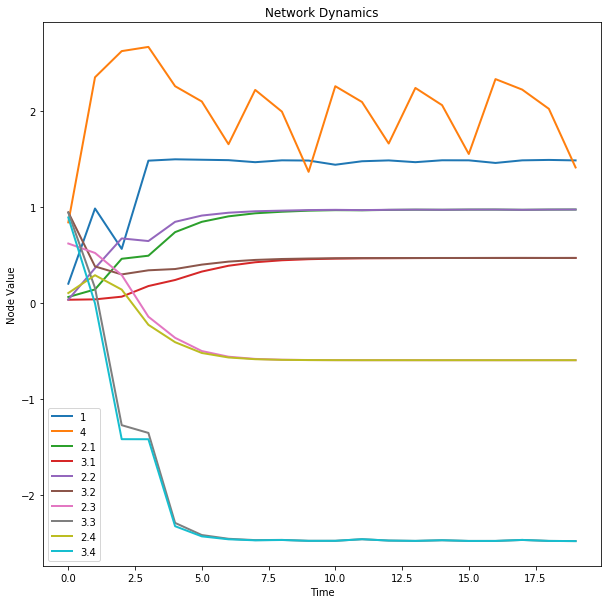

In [16]:
x0 = np.random.random(sm.n)
plt.figure(figsize=(10,10))
y = sm.iterate(20, x0, graph=True, save_img=True, title='nonlinear')

In [14]:
np.real(la.eig(sm.stability_matrix())[0])

array([-0.88487808,  4.76338336,  2.56074734,  2.56074734,  0.49999998,
        0.49999998,  0.49999998,  0.49999998,  0.49999998,  0.49999998])